**Deep Audio Classification**

# **1. Prepare Data**
**1.1Basic Imports**

In [ ]:
# Basic python imports
import os
import shutil
!pip install tabulate --quiet
from tabulate import tabulate

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**1.2 View Audio Composition**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Base path to dataset
dataset_path = os.path.normpath('/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data')

# Table headers
table_headers = ["Folder", "No. of Audio Files"]
table_data = []

# Traverse over the folders
for folder in os.listdir(dataset_path):
    # Update the list with folder and audio count
    table_data.append([
        os.path.join(dataset_path, folder),
        len(os.listdir(os.path.join(dataset_path, folder)))
    ])

# Print the table
print(tabulate(table_data, table_headers, tablefmt="grid"))

+--------------------------------------------------------------------------------------------------+----------------------+
| Folder                                                                                           |   No. of Audio Files |
+==================================================================================================+======================+
| /content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Parsed_Capuchinbird_Clips     |                  217 |
+--------------------------------------------------------------------------------------------------+----------------------+
| /content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Parsed_Not_Capuchinbird_Clips |                  593 |
+--------------------------------------------------------------------------------------------------+----------------------+
| /content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Forest Recordings             |                  100 |
+-------

# **2. Install and Import Dependencies**

**2.1 Install Dependencies**

In [ ]:
# Install packages
!pip uninstall tensorflow --quiet --yes
!pip uninstall tensorflow-io --quiet --yes

!pip install tensorflow==2.10.0 tensorflow-io==0.27.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4

**2.2 Load Dependencies**

In [ ]:
# Import requried packages
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# **3. Build Data Loading Function**

**3.1 Define Paths to Files**

In [ ]:
# Define paths
CAPUCHIN_FILE = os.path.join(dataset_path, "Parsed_Capuchinbird_Clips", "XC3776-3.wav")
NON_CAPUCHIN_FILE = os.path.join(dataset_path, "Parsed_Not_Capuchinbird_Clips", "afternoon-birds-song-in-forest-26.wav")

In [ ]:
# View paths
CAPUCHIN_FILE, NON_CAPUCHIN_FILE

('/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Parsed_Capuchinbird_Clips/XC3776-3.wav',
 '/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-26.wav')

**3.2 Build Data loading function**

In [ ]:
# Function to load and process the data
def load_wav_16k_mono(filename):
    # Load the encoded wav file
    file_contents = tf.io.read_file(filename)

    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

    # Remove trailing axis
    wav = tf.squeeze(wav, axis=-1)

    # Cast the sample rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)

    # Goes from 44100hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

    # Return the wave data
    return wav

**3.3 Plot Wave**

In [ ]:
# Get the wave data for the files
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NON_CAPUCHIN_FILE)

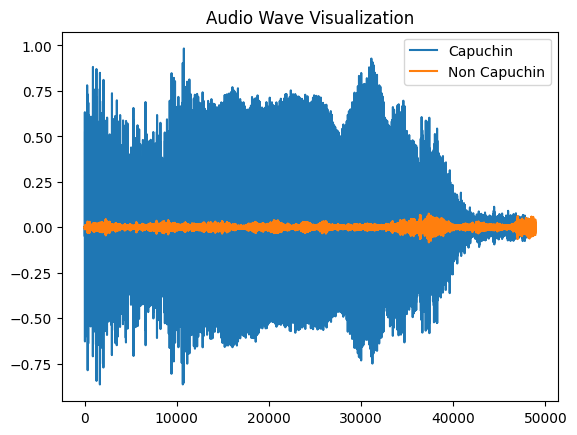

In [ ]:
# Plot the waves
plt.plot(wave)
plt.plot(nwave)
plt.legend(["Capuchin", "Non Capuchin"])
plt.title("Audio Wave Visualization")
plt.show()

# **4. Create Tensorflow Dataset**

**4.1 Define paths to positive and negative data**

In [ ]:
# Define the paths
POS = os.path.join(dataset_path, "Parsed_Capuchinbird_Clips")
NEG = os.path.join(dataset_path, "Parsed_Not_Capuchinbird_Clips")

In [ ]:
# Print the path
POS, NEG

('/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Parsed_Capuchinbird_Clips',
 '/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Parsed_Not_Capuchinbird_Clips')

**4.2 Create tensorflow datasets**

In [ ]:
# Prepare the dataset
POS_DF = tf.data.Dataset.list_files(os.path.join(POS, "*.wav"))
NEG_DF = tf.data.Dataset.list_files(os.path.join(NEG, "*.wav"))

**4.3 Add label and combine positive and negative samples**

In [ ]:
# Assign lables to data
positives = tf.data.Dataset.zip((POS_DF, tf.data.Dataset.from_tensor_slices(tf.ones(len(POS_DF)))))
negatives = tf.data.Dataset.zip((NEG_DF, tf.data.Dataset.from_tensor_slices(tf.zeros(len(NEG_DF)))))

In [ ]:
# Join the datasets
data = positives.concatenate(negatives)

# **5. Determine Average Length of a Capuchin bird call**

**5.1 Calculate Wave Cycle Length**

In [ ]:
# List to store the lengths of the Capuchin bird calls
lengths = []

# Traveres over the audio files
for file in os.listdir(POS):
    # Get the wave for the audio file
    tensor_wave = load_wav_16k_mono(os.path.join(POS, file))

    # Update the list
    lengths.append(len(tensor_wave))

**5.2 Calculate Mean, Min and Max**

In [ ]:
# Imports
import pandas as pd

# Conver the length to pandas series
lengths = pd.Series(lengths)

In [ ]:
# Stats for the lengths
lengths.describe()

count      217.000000
mean     54156.663594
std       8191.767002
min      32000.000000
25%      48000.000000
50%      56000.000000
75%      56000.000000
max      80000.000000
dtype: float64

In [ ]:
# Stats for the time
(lengths / 16000).describe()

count    217.000000
mean       3.384791
std        0.511985
min        2.000000
25%        3.000000
50%        3.500000
75%        3.500000
max        5.000000
dtype: float64

# **6. Build Processing Function to Convert to Spectrogram**

**6.1 Build Preprocessing Function**

In [ ]:
# Function to convert to image
def preprocess(file_path, label):
    # Get the wave
    wav = load_wav_16k_mono(file_path)

    # Get the first 56000 audio signals for every audio
    wav = wav[:56000]

    # Create zero padding
    zero_padding = tf.zeros([56000] - tf.shape(wav), dtype=tf.float32)

    # Join the wave and padding
    wav = tf.concat([zero_padding, wav], 0)

    # Get the spectrogram
    # Get the absolute values
    # Expand the dimensions
    spectrogram = tf.expand_dims(tf.abs(tf.signal.stft(wav, frame_length=320, frame_step=32)), axis=2)

    # Return the spectrogram and label
    return spectrogram, label

**6.2 Test out the function and viz the spectrogram**

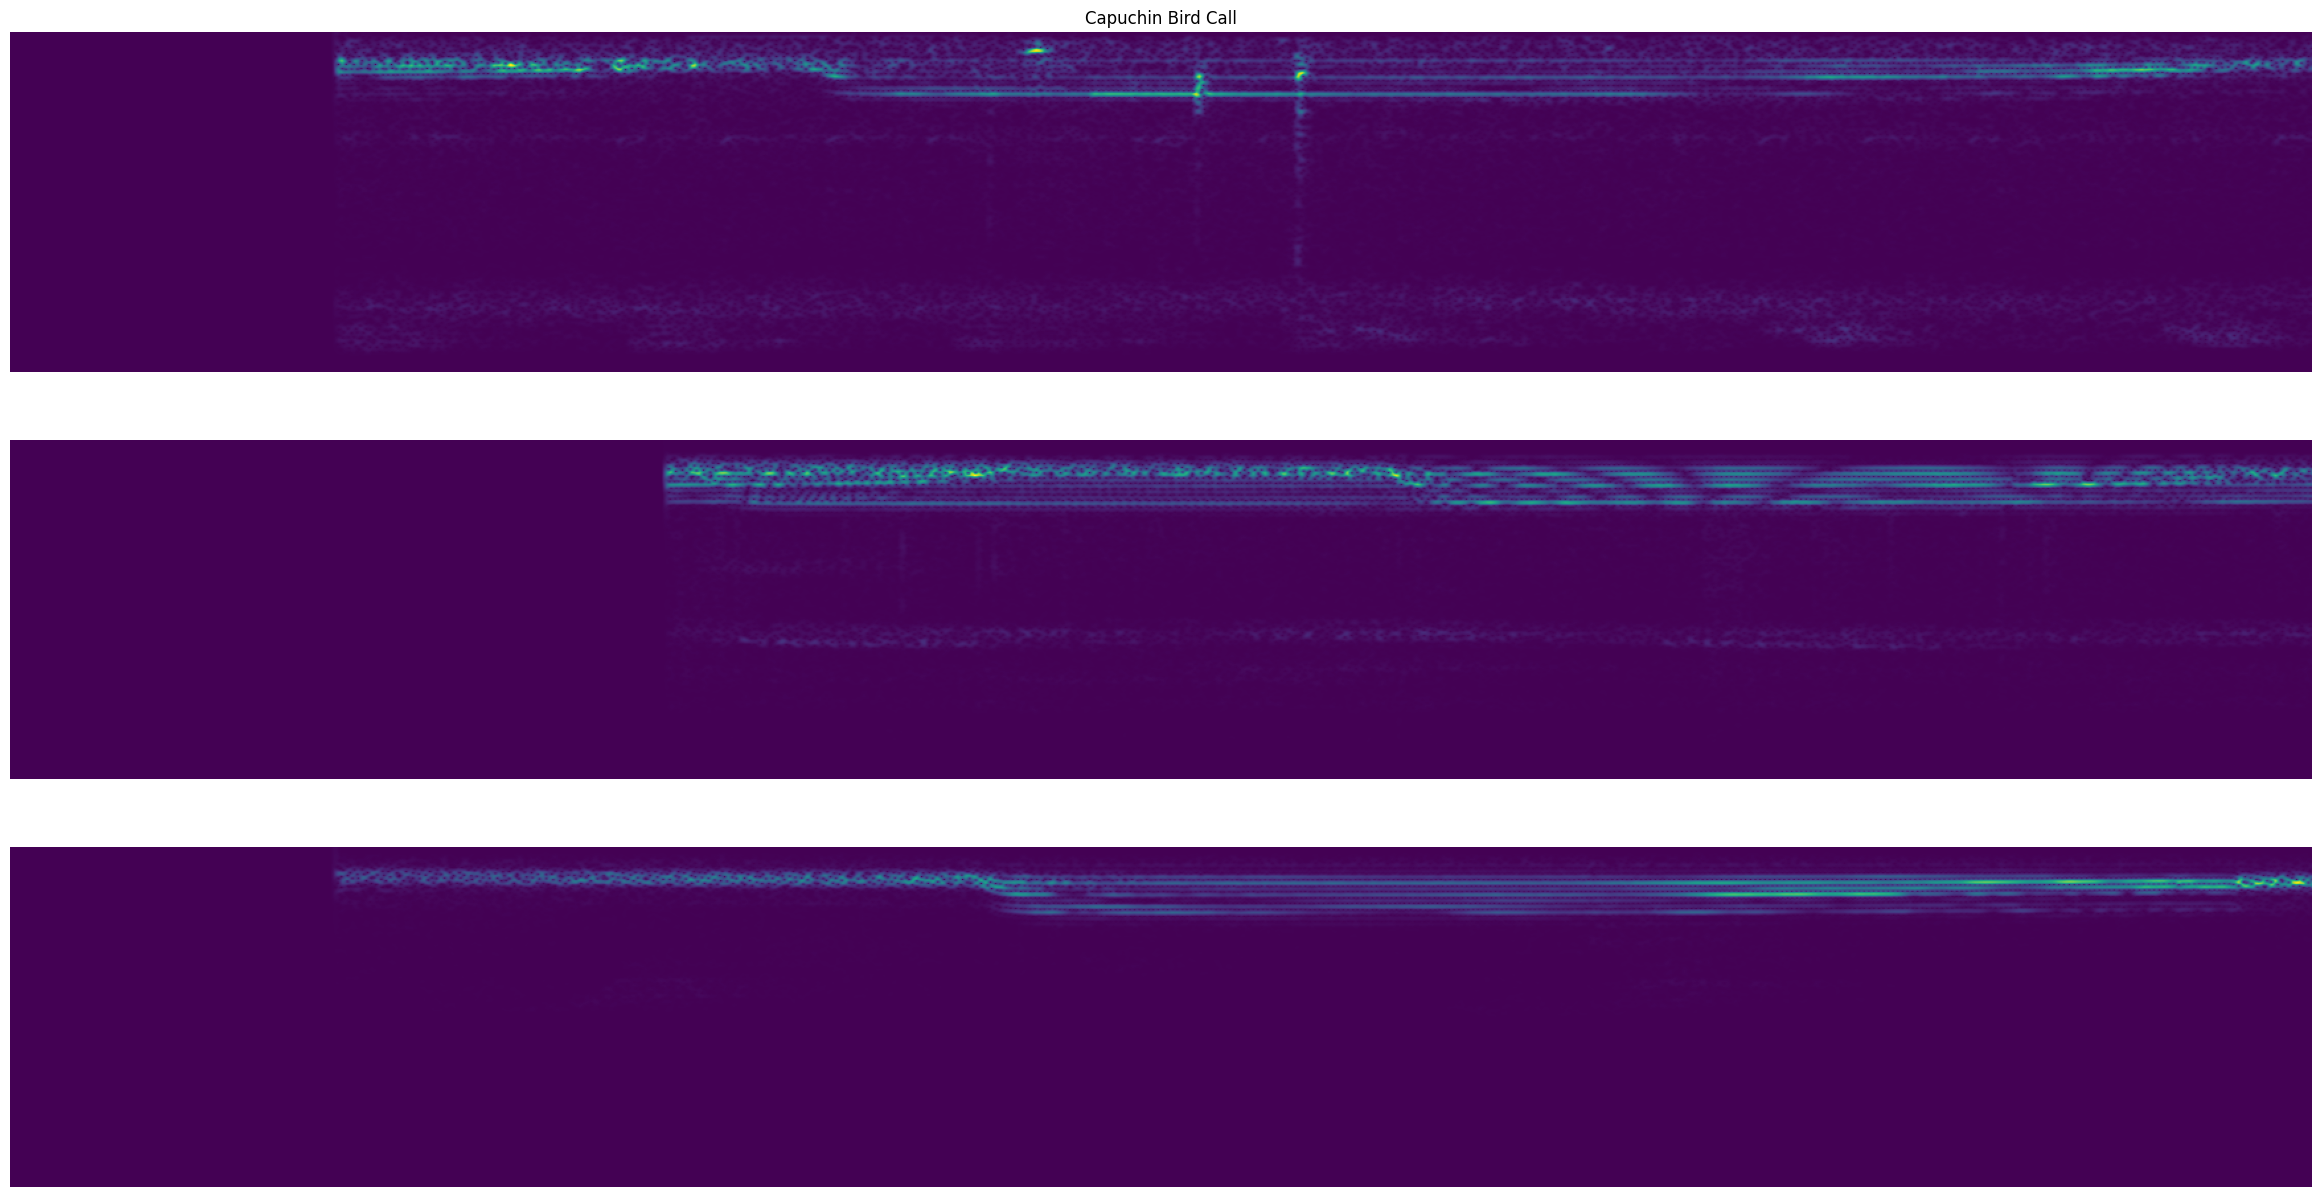

In [ ]:
# Get three random items from the positives
num_images = 3
random_positives = positives.shuffle(buffer_size=10000).take(num_images)
pos_iter = random_positives.as_numpy_iterator()

# Create subplots with reduced vertical space
fig, axs = plt.subplots(num_images, 1, figsize=(30, 5 * num_images))

# Process and visualize each image
for i in range(num_images):
    pos_filepath, pos_label = pos_iter.next()
    pos_spectrogram, pos_label = preprocess(pos_filepath, pos_label)

    # Display the image
    axs[i].imshow(tf.transpose(pos_spectrogram)[0])
    axs[i].axis('off')

# Set title
axs[0].set_title("Capuchin Bird Call")

# Show the plot
plt.show()

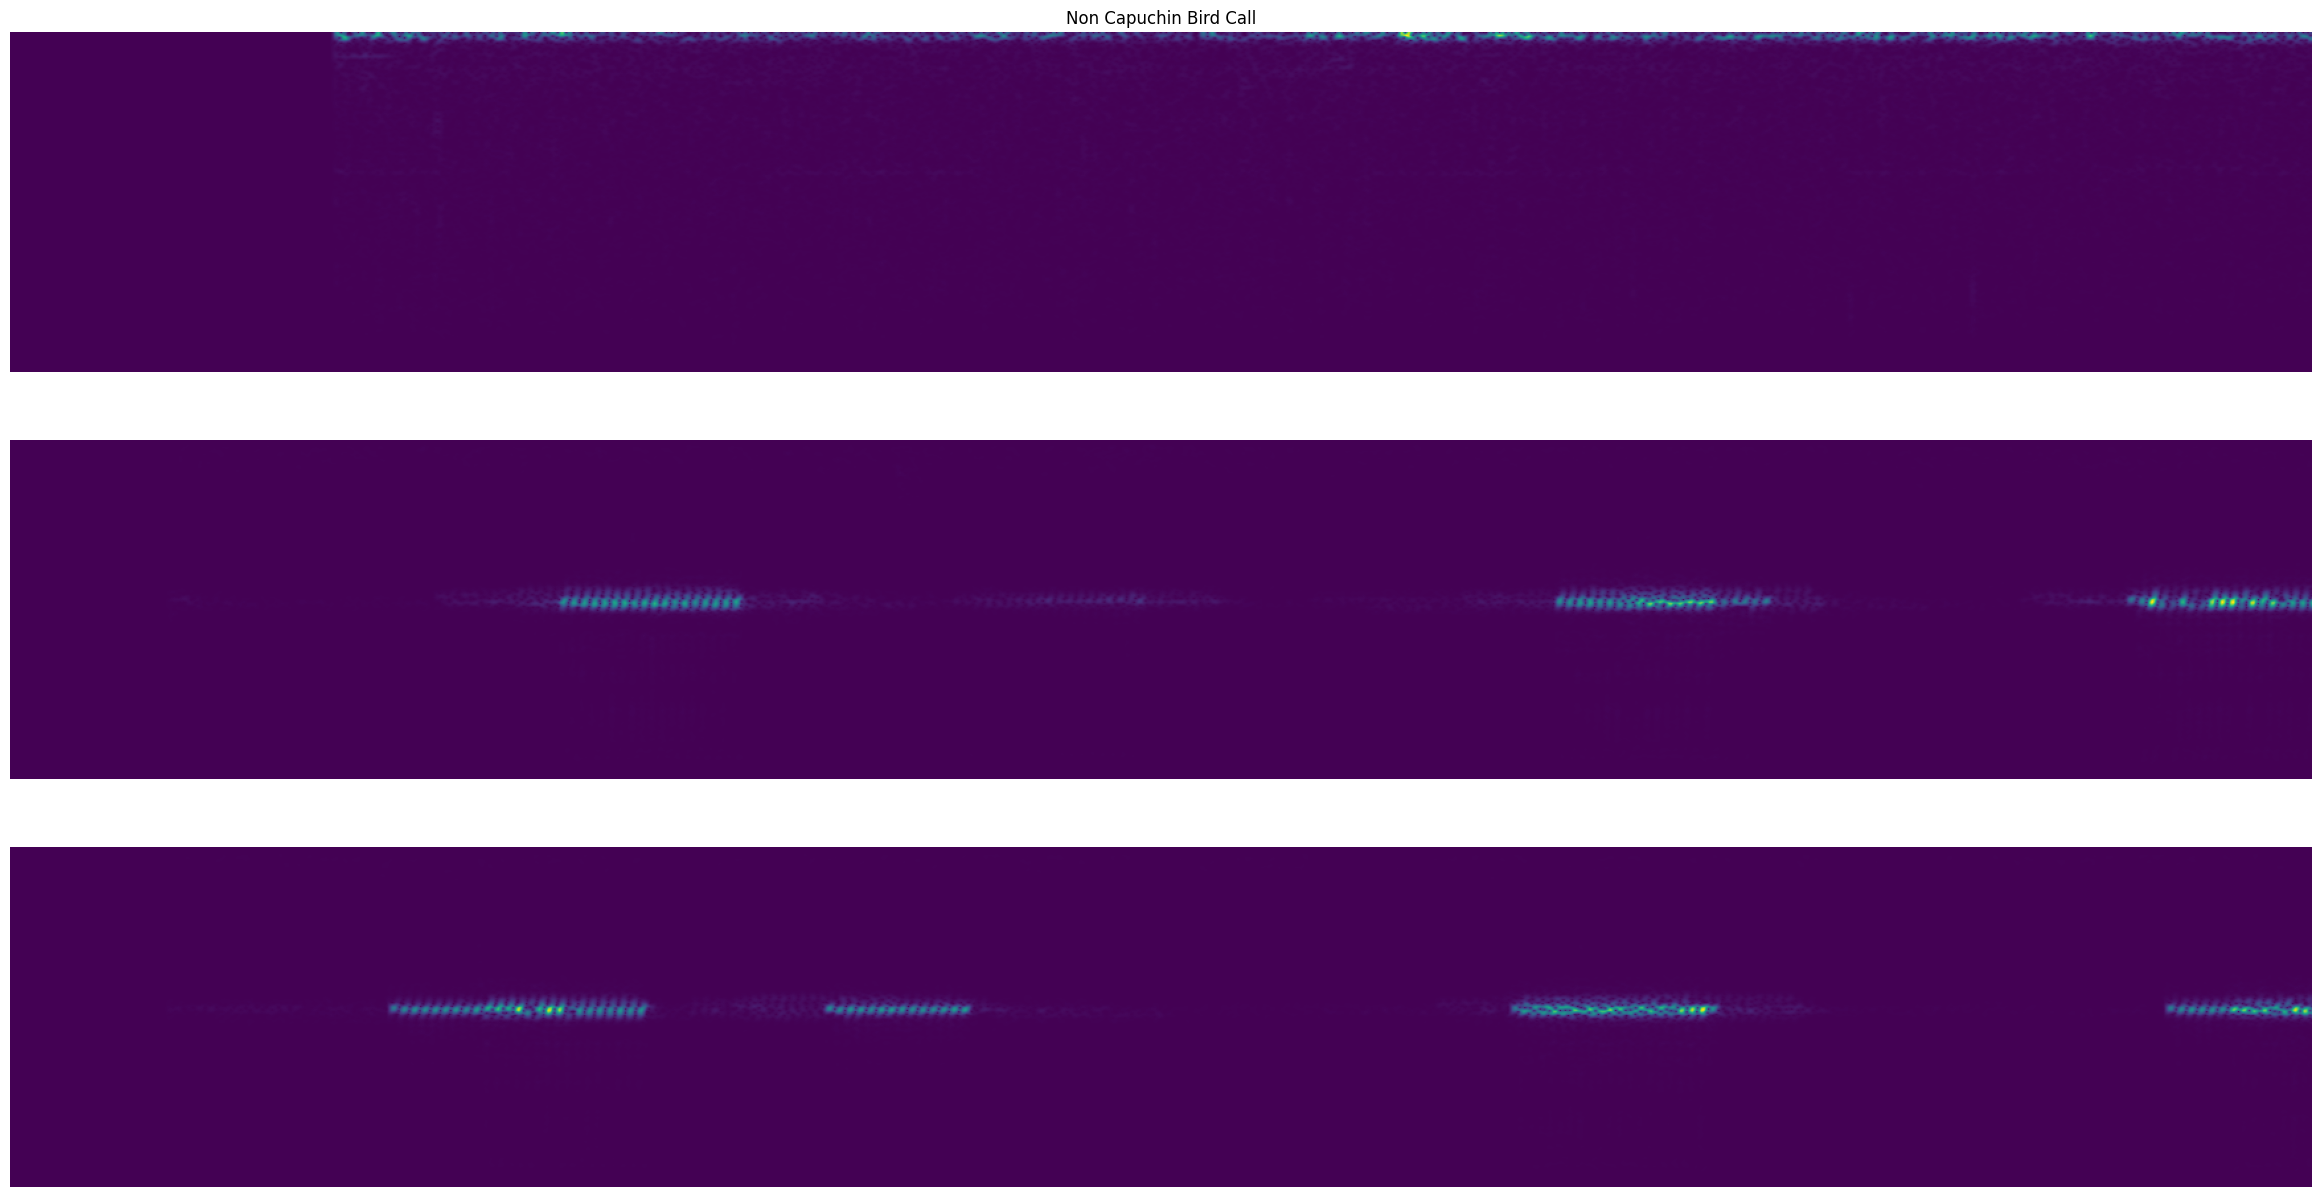

In [ ]:
# Get three random items from the negatives
num_images = 3
random_negatives = negatives.shuffle(buffer_size=10000).take(num_images)
neg_iter = random_negatives.as_numpy_iterator()

# Create subplots with reduced vertical space
fig, axs = plt.subplots(num_images, 1, figsize=(30, 5 * num_images))

# Process and visualize each image
for i in range(num_images):
    neg_filepath, neg_label = neg_iter.next()
    neg_spectrogram, neg_label = preprocess(neg_filepath, neg_label)

    # Display the image
    axs[i].imshow(tf.transpose(neg_spectrogram)[0])
    axs[i].axis('off')

# Set title
axs[0].set_title("Non Capuchin Bird Call")

# Show the plot
plt.show()

#**7. Create Training and Testing Partitions**

**7.1 Create a tensorflow data pipeline**

In [ ]:
# Pass the data through all the steps
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

**7.2 Split into training and testing partitions**

In [ ]:
# Get the train and test sets
train_df = data.take(36)
test_df = data.skip(36).take(15)

# **8. Build Deep Learning Model**

**8.1 Load Tensorflow Dependencies**

In [ ]:
# Imports
from tensorflow.keras import *

**8.2 Build Sequential Model, Compile and view summary**

In [ ]:
# Initialize a sequential model
model = models.Sequential()

# Convolutional block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1741, 257, 1)))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.25))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.25))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.25))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense layers with dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Using the Adam Optimizer with a specific learning rate
opt = optimizers.Adam(learning_rate=1e-4)

# Using BinaryCrossentropy as the loss function
loss_function = losses.BinaryCrossentropy()

# Compiling the model with BinaryCrossentropy loss, Adam optimizer, and additional metrics
model.compile(loss=loss_function, optimizer=opt, metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [ ]:
# Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1739, 255, 32)     320       
                                                                 
 batch_normalization (BatchN  (None, 1739, 255, 32)    128       
 ormalization)                                                   
                                                                 
 spatial_dropout2d (SpatialD  (None, 1739, 255, 32)    0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 869, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 867, 125, 64)      18496     
                                                        

In [ ]:
# Plot the model
utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True,
    dpi=300,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**8.3 Add Model Callbacks**

In [ ]:
# File Path to store the trained models
filepath = "/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/CNN-Models/model_{epoch:02d}-{val_accuracy:.2f}.h5"

# ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Early stopping callback with patience of 5
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

# Learning rate decay callback using LearningRateScheduler
def lr_schedule(epoch):
    initial_lr = 1e-4
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * (decay_factor ** (epoch // decay_step))
    return lr

# Initialize the learning rate scheduler
lr_decay = callbacks.LearningRateScheduler(lr_schedule)

# List of callbacks including ModelCheckpoint and LearningRateScheduler
callbacks_list = [early_stopping, checkpoint, lr_decay]

**8.4 Train the model**

In [ ]:
# Clear RAM
import gc
gc.collect()

6702

In [ ]:
# Triaining the model
history = model.fit(train_df, epochs=5, validation_data=test_df, callbacks=callbacks_list)

Epoch 1/5
36/36 [==============================] - ETA: 0s - loss: 0.5733 - accuracy: 0.8681 - precision: 0.7074 - recall: 0.8636
Epoch 1: val_accuracy improved from -inf to 0.86325, saving model to /content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/CNN-Models/model_01-0.86.h5
36/36 [==============================] - 171s 4s/step - loss: 0.5733 - accuracy: 0.8681 - precision: 0.7074 - recall: 0.8636 - val_loss: 0.3559 - val_accuracy: 0.8632 - val_precision: 1.0000 - val_recall: 0.4754 - lr: 1.0000e-04
Epoch 2/5
36/36 [==============================] - ETA: 0s - loss: 0.2720 - accuracy: 0.9132 - precision: 0.8025 - recall: 0.8784
Epoch 2: val_accuracy did not improve from 0.86325
36/36 [==============================] - 128s 4s/step - loss: 0.2720 - accuracy: 0.9132 - precision: 0.8025 - recall: 0.8784 - val_loss: 0.3751 - val_accuracy: 0.8162 - val_precision: 1.0000 - val_recall: 0.3582 - lr: 1.0000e-04
Epoch 3/5
36/36 [==============================] - ETA: 0s - loss: 

In [ ]:
# Clear the RAM
gc.collect()

4

**8.5 Vizualize Model Performance**

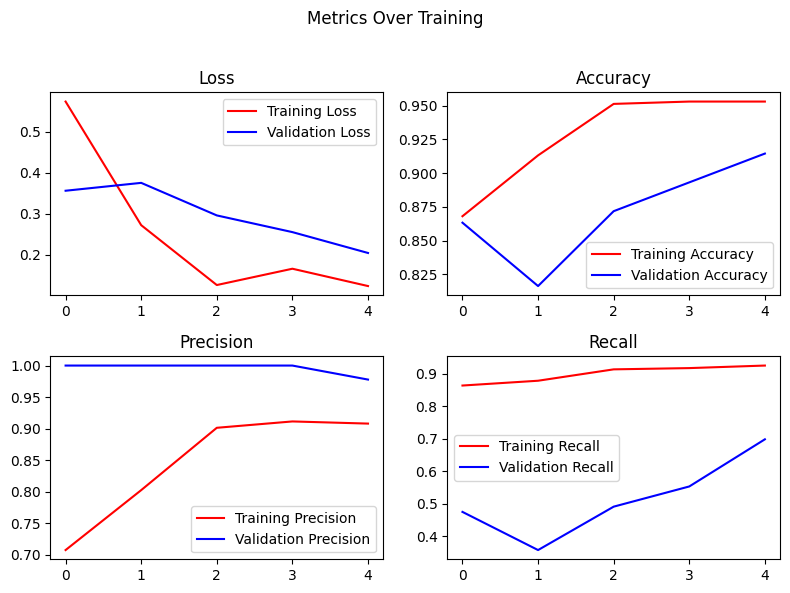

In [ ]:
# Assuming 'history' is your pandas DataFrame
metrics = ['loss', 'accuracy', 'precision', 'recall']
colors = ['red', 'blue']

# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Metrics Over Training')

# Traverse over metrics
for i, metric in enumerate(metrics):
    # Get the quotient and remainder
    row, col = divmod(i, 2)

    # Plot training values
    axes[row, col].plot(history.history[metric], color=colors[0], label=f'Training {metric.capitalize()}')

    # Plot validation values
    axes[row, col].plot(history.history[f'val_{metric}'], color=colors[1], label=f'Validation {metric.capitalize()}')

    # Get the title and legend
    axes[row, col].set_title(metric.capitalize())
    axes[row, col].legend()

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# **9. Make a prediction on a single clip**

**9.1 Get one batch and make prediction**

In [ ]:
# Get a sample from the test set
X_test, y_test = test_df.as_numpy_iterator().next()

In [ ]:
# View shape of data
X_test.shape, y_test.shape

((16, 1741, 257, 1), (16,))

In [ ]:
# Get the predictions
y_pred = model.predict(X_test)

# View the predictions
y_pred

**9.2 Convert Logits to classes**

In [ ]:
# Import
import numpy as np

# Flatten the predictions and convert to classes
y_pred = np.round(y_pred.flatten())

# View the new y_pred
y_pred

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
# Print out the actual values
y_test

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
      dtype=float32)

**9.3 Classification Report**

In [ ]:
# Import
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       1.00      0.86      0.92         7

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.94        16
weighted avg       0.94      0.94      0.94        16



# **10. Load Model**

**10.1 Load Pretrained model**

In [ ]:
# Imports
import glob

# Traverse the folder to find the best model
best_model = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/CNN-Models/*.h5"))[-1]

# Load the model
model = tf.keras.models.load_model(best_model)

# View model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1739, 255, 32)     320       
                                                                 
 batch_normalization (BatchN  (None, 1739, 255, 32)    128       
 ormalization)                                                   
                                                                 
 spatial_dropout2d (SpatialD  (None, 1739, 255, 32)    0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 869, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 867, 125, 64)      18496     
                                                        

# **11. Build forest parsing functions**

**11.1 Load up mp3**

In [ ]:
# Function to load the MP3 audio files
def load_mp3_16k_mono(filename):
    # Load the audio file
    res = tfio.audio.AudioIOTensor(filename)

    # Convert to tensor and combine channels
    tensor =  tf.math.reduce_sum(res.to_tensor(), axis=1) / 2

    # Extract sample rate and cast
    sample_rate = tf.cast(res.rate, dtype=tf.int64)

    # Resample to 16k hz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)

    # Return the wav
    return wav

In [ ]:
# Load a sample file using the function
wav = load_mp3_16k_mono("/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Forest Recordings/recording_00.mp3")

# View the data
wav

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

**11.2 Slick the sample audio**

In [ ]:
# Slice the audio file into multiple segments
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=56000, sequence_stride=56000, batch_size=1)

# Extract the sample from from the slices
sample, idx = audio_slices.as_numpy_iterator().next()

In [ ]:
# View the shape of audio and number of audio slices
sample.shape, len(audio_slices)

((1, 56000), 51)

**11.3 Function to convert clips into windowed spectrograms**

In [ ]:
# Function to preprocess and get the spectrogram
def preprocess_mp3(sample, idx):
    # Get the sample
    sample = sample[0]

    # Add the zero padding
    zero_padding = tf.zeros([56000] - tf.shape(sample), dtype=tf.float32)

    # Get the padded wave
    wav = tf.concat([zero_padding, sample], 0)

    # Get the spectrogram
    spectrogram = tf.expand_dims(tf.abs(tf.signal.stft(wav, frame_length=320, frame_step=32)), axis=2)

    # Return the spectrogram
    return spectrogram

**11.4 Convert Longer Clips into windows**

In [ ]:
# Slice the audio file into multiple segments
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=56000, sequence_stride=56000, batch_size=1)

# Map the audio slices to the function
audio_slices = audio_slices.map(preprocess_mp3)

# Batch the slices
audio_slices = audio_slices.batch(64)

# **12. Prediction on sample**

**12.1 Make predictions on sample**

In [ ]:
# Imports
import numpy as np

# Get the predictions
pred_labels = model.predict(audio_slices)

1/1 [==============================] - 2s 2s/step


In [ ]:
# Round the predictions
pred_labels = np.round(pred_labels.flatten())

# # Round the predictions with increased confidence
# pred_labels = np.where(pred_labels.flatten() > 0.8, 1, 0)

In [ ]:
# View the predicted labels
len(pred_labels), pred_labels

(51,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [ ]:
# Get the sum to count the number of times the bird sound was found
np.sum(pred_labels)

5.0

**12.2 Group Consecutive Detections**

In [ ]:
# Imports
from itertools import groupby

# Apply the function to predictions
pred_labels = [key for key, group in groupby(pred_labels)]

# View the grouped results
pred_labels

[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]

In [ ]:
# Get the sum to get the final number of calls
np.sum(pred_labels)

5.0

# **13. Prediction on all forest recordings**

**13.1 Get number of calls in each recording**

In [ ]:
# Import
from tqdm import tqdm_notebook

# List to store the results
results = []

# Traverse over the folder for files
for file in tqdm_notebook(os.listdir("/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Forest Recordings")):
    # Get the path to file
    file_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/DL-AudioClassification/data/Forest Recordings", file)

    # Get the wave for the file
    wav = load_mp3_16k_mono(file_path)

    # Get the audio slices
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(
        wav, wav,
        sequence_length=56000,
        sequence_stride=56000,
        batch_size=1
    ).map(preprocess_mp3).batch(64)

    # Get the predictions
    pred_labels = model.predict(audio_slices)

    # Round the predictions
    pred_labels = np.round(pred_labels.flatten())

    # Group consecutive calls
    pred_labels = [key for key, group in groupby(pred_labels)]

    # Get the sum to get the final number of calls
    total_calls = np.sum(pred_labels)

    # Add data to file
    results.append((file, total_calls))

**13.2 Convert the list to Pandas dataframe**

In [ ]:
# Imports
import pandas as pd

# Create pandas dataframe
result_df = pd.DataFrame(results, columns=["recording", "capuchin_calls"])

In [ ]:
# View the dataframe
result_df

,recording,capuchin_calls
0,recording_05.mp3,0.0
1,recording_13.mp3,0.0
2,recording_03.mp3,0.0
3,recording_04.mp3,4.0
4,recording_08.mp3,20.0
...,...,...
95,recording_99.mp3,5.0
96,recording_97.mp3,4.0
97,recording_98.mp3,21.0
98,recording_95.mp3,4.0


In [ ]:
# Export to csv file
result_df.to_csv("capuchinbird_results.csv", index=False)